# LC-MS MS2 pos & neg vs Microbiome

In [28]:
import pandas as pd
import numpy as np
import os
import biom

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt

import prince

%matplotlib inline

In [29]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/MicrobiomeMetabolome

In [30]:
# set the directory 
os.chdir('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/MicrobiomeMetabolome')

In [31]:
group_colors = {
    'Bacteria': "#440154FF",        # Dark purple  
    'Climate': "#39558CFF",         # Blue  
    'Fungi': "#238A8DFF",           # Teal  
    'Metabolites_Neg': "#56C667FF", # Green  
    'Metabolites_Pos': "#B8DE29FF", # Yellow-green  
    'Plots': "#DCE318FF",           # Yellow  
    'Wine Chemistry': "#FDE725FF"   # Bright yellow  
}

# Load and Merge all data

### 1. Microbiome data 

In [32]:
df_ITS = pd.read_csv('ITS/PostMLF_cOTUs_rarefied_labled.tsv', sep='\t', index_col=0)
df_ITS.head()

,index,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__unidentified;f__unidentified;g__unidentified;s__unidentified,k__Fungi;p__Ascomycota;c__Leotiomycetes;o__Helotiales;f__Hyaloscyphaceae;g__Hyaloscypha;s__unidentified,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Capnodiales;f__Cladosporiaceae;g__Cladosporium;s__Cladosporium_austrohemisphaericum,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Pleosporaceae;g__Alternaria;s__Alternaria_subcucurbitae,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Botryosphaeriales;f__Planistromellaceae;g__Ramimonilia;s__Ramimonilia_apicalis,k__Fungi;p__Basidiomycota;c__Malasseziomycetes;o__Malasseziales;f__Malasseziaceae;g__Malassezia;s__Malassezia_restricta,k__Fungi;p__Ascomycota;c__unidentified;o__unidentified;f__unidentified;g__unidentified;s__unidentified,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Pleosporaceae;g__Alternaria;s__Alternaria_eureka,k__Fungi;p__Basidiomycota;c__Microbotryomycetes;o__Sporidiobolales;f__Sporidiobolaceae;g__Rhodotorula;s__Rhodotorula_graminis,...,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Didymosphaeriaceae;g__Paracamarosporium;s__Paracamarosporium_hawaiiense,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Pleosporaceae;g__unidentified;s__unidentified,k__Fungi;p__Basidiomycota;c__Pucciniomycetes;o__Pucciniales;f__Melampsoraceae;g__Melampsora;s__Melampsora_epitea,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Dothideales;f__Dothioraceae;g__Hormonema;s__Hormonema_macrosporum,k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Hypocreales;f__Clavicipitaceae;g__Claviceps;s__Claviceps_purpurea,k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Chaetothyriales;f__unidentified;g__unidentified;s__unidentified,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Dothideales;f__Dothideaceae;g__Endoconidioma;s__Endoconidioma_populi,k__Fungi;p__Ascomycota;c__Arthoniomycetes;o__Lichenostigmatales;f__Phaeococcomycetaceae;g__Phaeococcomyces;s__unidentified,k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Hypocreales;f__Hypocreales_fam_Incertae_sedis;g__Acremonium;s__unidentified,k__Fungi;p__Ascomycota;c__Lecanoromycetes;o__Teloschistales;f__Teloschistaceae;g__Gallowayella;s__Gallowayella_poeltii
0,PostMLF_2023_Plot4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PostMLF_2023_Plot13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PostMLF_2023_Plot9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PostMLF_2023_Plot5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PostMLF_2021_Plot12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_16S = pd.read_csv('16S/PostMLF_cOTUs_rarefied_labled.tsv', sep='\t', index_col=0)

# drop E. Coli because it skews the distribution majorly 
# MFA loading = Inf 
df_16S.drop(columns=['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacterales; f__Enterobacteriaceae; g__Escherichia-Shigella; s__Escherichia_coli'], inplace=True)

df_16S.head()

,index,d__Bacteria; p__Actinobacteriota; c__Thermoleophilia; o__Solirubrobacterales; f__Solirubrobacteraceae; g__Solirubrobacter; s__bacterium_Ellin6048,d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Acetobacterales; f__Acetobacteraceae; g__Acetobacter; s__Acetobacter_cerevisiae,d__Bacteria; p__Actinobacteriota; c__Actinobacteria; o__Pseudonocardiales; f__Pseudonocardiaceae; g__Actinomycetospora; s__uncultured_bacterium,d__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Leuconostocaceae; g__Oenococcus; s__Oenococcus_oeni,d__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__Pirellula; s__uncultured_Planctomycetaceae,d__Bacteria; p__Methylomirabilota; c__Methylomirabilia; o__Rokubacteriales; f__Rokubacteriales; g__Rokubacteriales; s__uncultured_bacterium,d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Acetobacterales; f__Acetobacteraceae; g__Acetobacter; s__uncultured_Alphaproteobacteria,d__Bacteria; p__Acidobacteriota; c__Vicinamibacteria; o__Vicinamibacterales; f__Vicinamibacteraceae; g__uncultured; s__uncultured_bacterium,d__Bacteria; p__Verrucomicrobiota; c__Verrucomicrobiae; o__Pedosphaerales; f__Pedosphaeraceae; g__uncultured; s__uncultured_bacterium,...,d__Bacteria; p__Actinobacteriota; c__Actinobacteria; o__Corynebacteriales; f__Mycobacteriaceae; g__Mycobacterium; s__Mycobacterium_sp.,d__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__uncultured; s__uncultured_bacterium,d__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridia; f__Hungateiclostridiaceae; g__Ruminiclostridium; s__Ruminiclostridium_hungatei,d__Bacteria; p__Chloroflexi; c__TK10; o__TK10; f__TK10; g__TK10; s__uncultured_bacterium.2,d__Bacteria; p__Acidobacteriota; c__Vicinamibacteria; o__Vicinamibacterales; f__Vicinamibacteraceae; g__Vicinamibacteraceae; s__uncultured_bacterium.2,d__Bacteria; p__Chloroflexi; c__Anaerolineae; o__SBR1031; f__A4b; g__A4b; s__metagenome,d__Bacteria; p__Actinobacteriota; c__Thermoleophilia; o__Gaiellales; f__uncultured; g__uncultured; s__uncultured_microorganism,d__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__Pirellula; s__uncultured_bacterium.3,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacterales; f__Enterobacteriaceae; g__Salmonella; s__Salmonella_enterica,d__Bacteria; p__Acidobacteriota; c__Vicinamibacteria; o__Vicinamibacterales; f__Vicinamibacteraceae; g__Vicinamibacteraceae; s__uncultured_bacterium.3
0,PostMLF_2023_Plot4,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PostMLF_2023_Plot13,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
2,PostMLF_2023_Plot9,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PostMLF_2023_Plot5,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PostMLF_2021_Plot17,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Metabolites

In [34]:
df_wMetadata_cleaned_collapsed = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/Pos_MS2_OutlierRemoved.csv', index_col=0)
postMLF_df_Pos = df_wMetadata_cleaned_collapsed[df_wMetadata_cleaned_collapsed['sample_type'] == 'PostMLF'].reset_index()
postMLF_df_Pos.shape

(31, 195)

In [35]:
df_wMetadata_cleaned_collapsed = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/Neg_MS2_OutlierRemoved.csv', index_col=0)
postMLF_df_Neg = df_wMetadata_cleaned_collapsed[df_wMetadata_cleaned_collapsed['sample_type'] == 'PostMLF'].reset_index()
postMLF_df_Neg.shape

(31, 174)

In [36]:
postMLF_df_all = pd.merge(postMLF_df_Pos, postMLF_df_Neg, on=('Sample Name', 'sample_type', 'year', 'plot'), how='outer')
postMLF_df_all.shape

(31, 365)

### 3. Climate, Plot MD and Wine Chemistry

In [37]:
# CHEMISTRY
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/Raw-MD_Vineyard_MV_data.csv')
md["Plot_str"] = "Plot" + md["Plot"].astype(str)
md_wine_chemistry = md[['Plot_str', 'Year', 'Must_Oechsle', 'Wine_Tartatic_Acid', 
                        'Wine_Malic_Acid', 'Wine_Glucose', 'Wine_Fructose', 
                        'Wine_Lactic_Acid', 'Wien_Glycerol', 'Wine_Acetic_Acid']]

df_merged_1 = postMLF_df_all.merge(md_wine_chemistry, left_on=["plot", "year"], right_on=["Plot_str", "Year"], how="inner")
df_merged_1 = df_merged_1.drop(columns=['Plot_str', 'Year', 'sample_type']).dropna()

df_merged_1.head()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,"3,4-Bis(3-Methoxyanilino)cyclobut-3-ene-1,2-dione",L(-)-Fucose,Must_Oechsle,Wine_Tartatic_Acid,Wine_Malic_Acid,Wine_Glucose,Wine_Fructose,Wine_Lactic_Acid,Wien_Glycerol,Wine_Acetic_Acid
0,PostMLF_2021_Plot11,2021,Plot11,-0.585963,-0.474270,-0.532204,-0.538732,-0.766243,0.481209,-0.652926,...,-0.715982,0.228518,75.0,3.42,0.06,0.33,0.30,1.87,7.13,1.03
1,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,-0.578826,-1.005457,75.0,2.61,0.09,0.33,0.28,1.53,7.13,0.68
2,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,-0.572144,-0.518829,78.0,3.06,0.06,0.34,0.29,1.47,6.90,0.77
3,PostMLF_2021_Plot15,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,-0.452500,...,-0.426984,0.887012,73.0,3.43,0.07,0.33,0.30,1.69,6.29,0.75
4,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,-0.602861,0.479041,73.0,3.06,0.15,0.42,0.29,1.79,7.24,0.81


In [38]:
# PLOTS
md_plots = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux_plots.csv')
md_plots["Plot_str"] = "Plot" + md_plots["Plot"].astype(str)
md_plots_subset =  md_plots[['Plot_str', 'Altitude', 'Average_slope', 'Exposition', 'Average_radiation', 'Geology', 'Hydromorphie_code']]
# Convert categorical columns to dummy variables
categorical_cols = ['Exposition', 'Geology']
md_plots_subset_dummies = pd.get_dummies(md_plots_subset, columns=categorical_cols, drop_first=True)
# Convert boolean columns to integers (0 or 1)
boolean_columns = md_plots_subset_dummies.select_dtypes(include='bool').columns
md_plots_subset_dummies[boolean_columns] = md_plots_subset_dummies[boolean_columns].astype(int)

df_merged_2 = df_merged_1.merge(md_plots_subset_dummies, left_on=["plot"], right_on=["Plot_str"], how="inner")
df_merged_2 = df_merged_2.drop(columns=['Plot_str']).dropna()

df_merged_2.head()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,Wien_Glycerol,Wine_Acetic_Acid,Altitude,Average_slope,Average_radiation,Hydromorphie_code,Exposition_South-West,Geology_Colluvium,Geology_Gravel_moraine,Geology_Molasse
0,PostMLF_2021_Plot11,2021,Plot11,-0.585963,-0.474270,-0.532204,-0.538732,-0.766243,0.481209,-0.652926,...,7.13,1.03,490,20,937.5,1,0,0,1,0
1,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,7.13,0.68,580,30,937.5,1,1,0,0,1
2,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,6.90,0.77,440,25,912.5,1,0,0,0,0
3,PostMLF_2021_Plot15,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,-0.452500,...,6.29,0.75,520,30,912.5,0,1,0,1,0
4,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,7.24,0.81,390,20,912.5,1,1,0,0,1


In [39]:
# CLIMATE
md_climate = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux-Climate.csv', index_col=0)
# Remove underscores from the 'Plot' column
md_climate['Plot'] = md_climate['Plot'].str.replace('_', '', regex=False)
# include more climate data 
#md_climate_subset = md_climate[['Plot', 'Year', 'cv_rh', 'average_rh', 'cv_temperature', 'accumulated_temperature', 'average_temperature']]
# minimum 
md_climate_subset = md_climate[['Plot', 'Year',  'average_rh','average_temperature']]

df_merged_3 = df_merged_2.merge(md_climate_subset, left_on=["plot", "year"], right_on=["Plot", "Year"], how="inner")
df_merged_3 = df_merged_3.drop(columns=['Plot', 'Year']).dropna()

df_merged_3.head()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,Altitude,Average_slope,Average_radiation,Hydromorphie_code,Exposition_South-West,Geology_Colluvium,Geology_Gravel_moraine,Geology_Molasse,average_rh,average_temperature
0,PostMLF_2021_Plot11,2021,Plot11,-0.585963,-0.474270,-0.532204,-0.538732,-0.766243,0.481209,-0.652926,...,490,20,937.5,1,0,0,1,0,71.948958,17.964399
1,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,580,30,937.5,1,1,0,0,1,71.334895,17.544612
2,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,440,25,912.5,1,0,0,0,0,70.767447,18.343627
3,PostMLF_2021_Plot15,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,-0.452500,...,520,30,912.5,0,1,0,1,0,72.104023,17.892713
4,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,390,20,912.5,1,1,0,0,1,72.076768,18.476535


In [40]:
## add microbiome 
df_merged_4 = df_merged_3.merge(df_ITS, left_on=["Sample Name"], right_on=["index"], how="inner")
df_merged_4 = df_merged_4.drop(columns=['index']).dropna()

df_merged_all = df_merged_4.merge(df_16S, left_on=["Sample Name"], right_on=["index"], how="inner")
df_merged_all = df_merged_all.drop(columns=['index']).dropna()


df_merged_all.head() 

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,d__Bacteria; p__Actinobacteriota; c__Actinobacteria; o__Corynebacteriales; f__Mycobacteriaceae; g__Mycobacterium; s__Mycobacterium_sp.,d__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__uncultured; s__uncultured_bacterium,d__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridia; f__Hungateiclostridiaceae; g__Ruminiclostridium; s__Ruminiclostridium_hungatei,d__Bacteria; p__Chloroflexi; c__TK10; o__TK10; f__TK10; g__TK10; s__uncultured_bacterium.2,d__Bacteria; p__Acidobacteriota; c__Vicinamibacteria; o__Vicinamibacterales; f__Vicinamibacteraceae; g__Vicinamibacteraceae; s__uncultured_bacterium.2,d__Bacteria; p__Chloroflexi; c__Anaerolineae; o__SBR1031; f__A4b; g__A4b; s__metagenome,d__Bacteria; p__Actinobacteriota; c__Thermoleophilia; o__Gaiellales; f__uncultured; g__uncultured; s__uncultured_microorganism,d__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__Pirellula; s__uncultured_bacterium.3,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacterales; f__Enterobacteriaceae; g__Salmonella; s__Salmonella_enterica,d__Bacteria; p__Acidobacteriota; c__Vicinamibacteria; o__Vicinamibacterales; f__Vicinamibacteraceae; g__Vicinamibacteraceae; s__uncultured_bacterium.3
0,PostMLF_2021_Plot11,2021,Plot11,-0.585963,-0.474270,-0.532204,-0.538732,-0.766243,0.481209,-0.652926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PostMLF_2021_Plot19,2021,Plot19,-0.518364,-0.397765,-0.432828,-0.504701,-1.485374,0.543542,-0.506653,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [41]:
# Keep track of the columns' origins
Fun_columns = df_ITS.iloc[:, 1:].columns.tolist()
Bac_columns = df_16S.iloc[:, 1:].columns.tolist()
metabolites_Neg_columns = postMLF_df_Neg.iloc[:, 4:].columns.tolist()
metabolites_Pos_columns = postMLF_df_Pos.iloc[:, 4:].columns.tolist()
wine_chemistry_columns = md_wine_chemistry.iloc[:, 2:].columns.tolist()
plots_columns = md_plots_subset_dummies.iloc[:, 1:].columns.tolist()
climate_columns = md_climate_subset.iloc[:, 2:].columns.tolist()
metadata_columns = ['Sample Name', 'year', 'plot']

In [42]:
# Create a multi-index column structure
multi_index_columns = (
    [('Metabolites_Pos', col) for col in metabolites_Pos_columns] +
    [('Metabolites_Neg', col) for col in metabolites_Neg_columns] +
    [('Wine Chemistry', col) for col in wine_chemistry_columns] +
    [('Plots', col) for col in plots_columns] +
    [('Climate', col) for col in climate_columns] +
    [('Fungi', col) for col in Fun_columns] +
    [('Bacteria', col) for col in Bac_columns])

# Subset data and assign multi-index
df_metadata = df_merged_all[metadata_columns]  # Keep metadata separately
df_mfa = df_merged_all.drop(columns=metadata_columns)  # Drop metadata
df_mfa.columns = pd.MultiIndex.from_tuples(multi_index_columns)  # Assign multi-index
df_mfa = df_mfa.astype("float64")

# Extract the group names (first level of multi-index)
groups = df_mfa.columns.levels[0].tolist()

df_mfa.shape

(22, 558)

In [43]:
# drop columns with zero variance 
zero_var_cols = df_mfa.std() == 0
df_mfa = df_mfa.loc[:, ~zero_var_cols]

df_mfa.shape

(22, 547)

In [44]:
# Check if there are any NaN values in df_mfa
nan_cells = df_mfa.isna().sum().sum()
print(f"Total NaN cells in df_mfa: {nan_cells}")

Total NaN cells in df_mfa: 0


# MFA 

## How many Components?

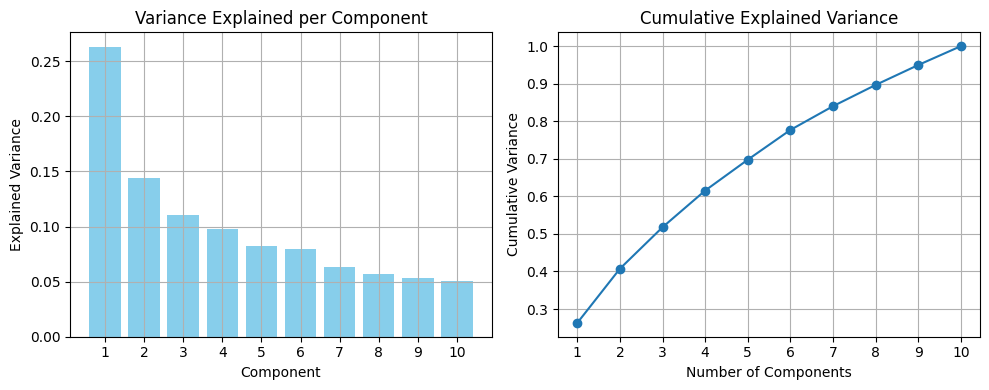

In [45]:
# Define the number of components to test
n_components = 10

# Define MFA and fit the model
mfa = prince.MFA(
    n_components=n_components,  
    n_iter=3, 
    copy=True,
    check_input=True,
    random_state=42)

# Fit MFA to the data (excluding metadata columns)
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

# Get explained variance per component
explained_variance_ratio = mfa.eigenvalues_ / np.sum(mfa.eigenvalues_)

# Create subplots for explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot for variance explained per component
axes[0].bar(range(1, n_components + 1), explained_variance_ratio[:n_components], color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Line plot for cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio[:n_components]), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()

In [46]:
# Initialize MFA model
mfa = prince.MFA(
    n_components=5,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit MFA with multi-index groups
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

mfa_results = mfa.transform(df_mfa)
# Merge MFA results with metadata to retain 'year' information
mfa_results = mfa_results.merge(df_metadata, left_index=True, right_index=True)

mfa.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,4.392,21.63%,21.63%
1,2.411,11.87%,33.51%
2,1.844,9.08%,42.59%
3,1.629,8.02%,50.61%
4,1.372,6.76%,57.37%


/scratch/lfloerl/tmpdata/ipykernel_2770356/4024269401.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Group', y='Sum of Contributions', data=df_plot, palette='viridis')


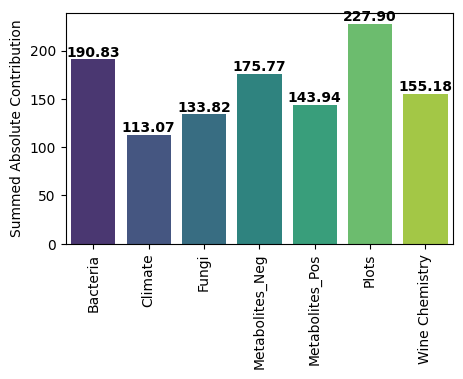

In [47]:
partial_coords = mfa.partial_row_coordinates(df_mfa)

# Assuming `partial_coords` is the dataframe you obtained from MFA
df_abs_sum = partial_coords.abs().sum()

# Convert to DataFrame for plotting
df_plot = df_abs_sum.groupby(level=0).sum().reset_index()
df_plot.columns = ['Group', 'Sum of Contributions']

# Plot
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='Group', y='Sum of Contributions', data=df_plot, palette='viridis')
# Add numeric values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Summed Absolute Contribution')
plt.show()

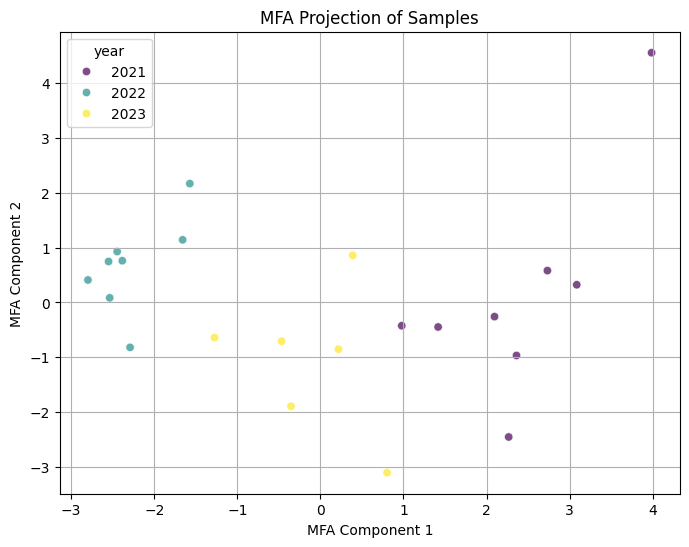

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)
plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")
plt.title("MFA Projection of Samples")
plt.grid()
plt.show()

In [49]:
# Extract coordinates of individuals (rows)
individuals = mfa_results.iloc[:, :2].values  # First 2 components

# Extract variable loadings (correlations with MFA axes)
variable_loadings = mfa.column_correlations.iloc[:, :2]

# Drop the multi-index
variable_loadings_df = variable_loadings.reset_index()

# Rename columns
variable_loadings_df.columns = ["Variable", "MFA Comp 1", "MFA Comp 2"]

# Compute Loadings contribution (sum of squared correlations)
variable_loadings_df["Loadings Contribution"] = ( variable_loadings_df["MFA Comp 1"].abs() + variable_loadings_df["MFA Comp 2"].abs())

# Sort by Loadings contribution in descending order
variable_loadings_df = variable_loadings_df.sort_values(by="Loadings Contribution", ascending=False)

variable_loadings_df["group"] = variable_loadings_df["Variable"].apply(lambda x: x[0])

# Select top 20 based on Loadings Contribution
top_loadings = variable_loadings_df.nlargest(15, "Loadings Contribution")
top_loadings['Variable'] = top_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

top_loadings

,Variable,MFA Comp 1,MFA Comp 2,Loadings Contribution,group
84,'average_temperature',-0.723046,-0.509779,1.232825,Climate
269,'2,-0.692748,0.538724,1.231472,Metabolites_Neg
502,'tert-Butyl N-[1-(aminocarbonyl)-3-methylbuty...,0.831965,-0.331681,1.163646,Metabolites_Pos
501,'tert-Butyl N-[1-(aminocarbonyl)-3-methylbuty...,0.863990,-0.297584,1.161575,Metabolites_Pos
98,'k__Fungi;p__Basidiomycota;c__Ustilaginomycet...,0.502821,0.651103,1.153924,Fungi
408,'Imidazolelactic acid',-0.813507,0.336331,1.149838,Metabolites_Pos
454,'NP-016455',0.806869,-0.337055,1.143924,Metabolites_Pos
121,'k__Fungi;p__Ascomycota;c__Dothideomycetes;o_...,0.489272,0.654120,1.143393,Fungi
157,'k__Fungi;p__Ascomycota;c__Dothideomycetes;o_...,0.490734,0.642404,1.133138,Fungi
111,'k__Fungi;p__Basidiomycota;c__Tremellomycetes...,0.506005,0.625618,1.131623,Fungi


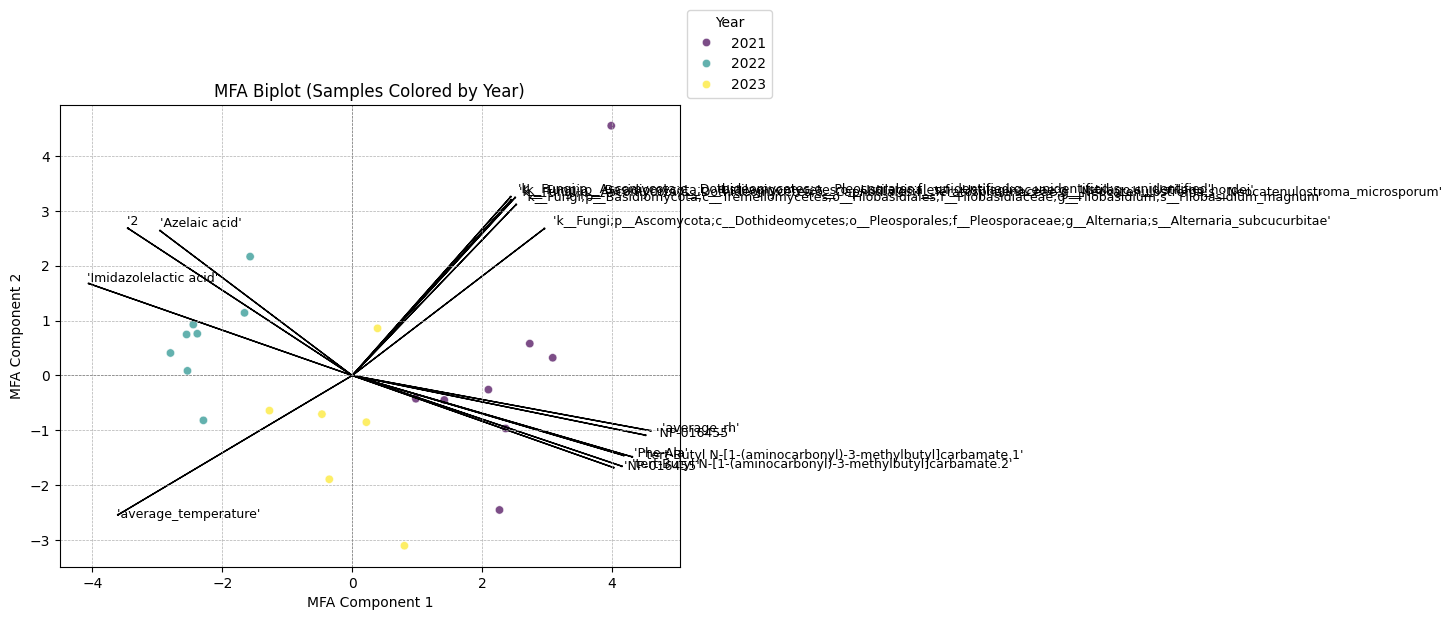

In [50]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)


# Define a scaling factor to extend the arrows
scaling_factor = 5 # Adjust this value to control arrow length
# Plot the top loadings as arrows
for i, row in top_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  # Adjust text position accordingly
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)


# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Samples Colored by Year)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

# All

NameError: name 'mpatches' is not defined

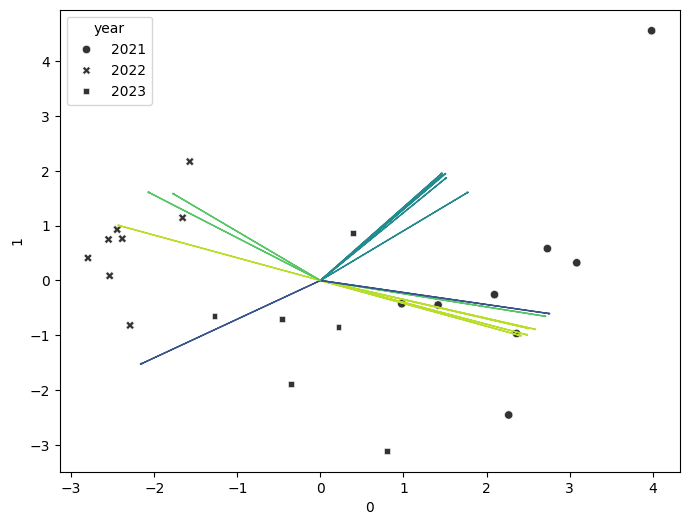

In [51]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], style="year", alpha=0.8, color='black')

# Define a scaling factor to extend the arrows
scaling_factor = 3  

# Create a color map based on the group and intensity (Total Contribution)
norm = plt.Normalize(vmin=top_loadings['Loadings Contribution'].min(), vmax=top_loadings['Loadings Contribution'].max())  
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm)
sm.set_array([])

# Plot the top loadings as arrows with colors based on the group and intensity by Total Contribution
for i, row in top_loadings.iterrows():
    group_color = group_colors.get(row['group'], 'black')  
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color=group_color, length_includes_head=True)

# Add first legend for groups (custom patches)
group_legend_patches = [mpatches.Patch(color=color, label=group) for group, color in group_colors.items()]
group_legend = ax.legend(handles=group_legend_patches, title="Groups", loc="upper right", bbox_to_anchor=(1.2, 1))

# Add second legend for Year (from scatterplot)
year_legend = ax.legend(title="Year", bbox_to_anchor=(1.18, 0.7))

# Add both legends back to the plot
ax.add_artist(group_legend)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("")

# Show grid
ax.grid(True, linestyle="--", linewidth=0.5)

plt.show()


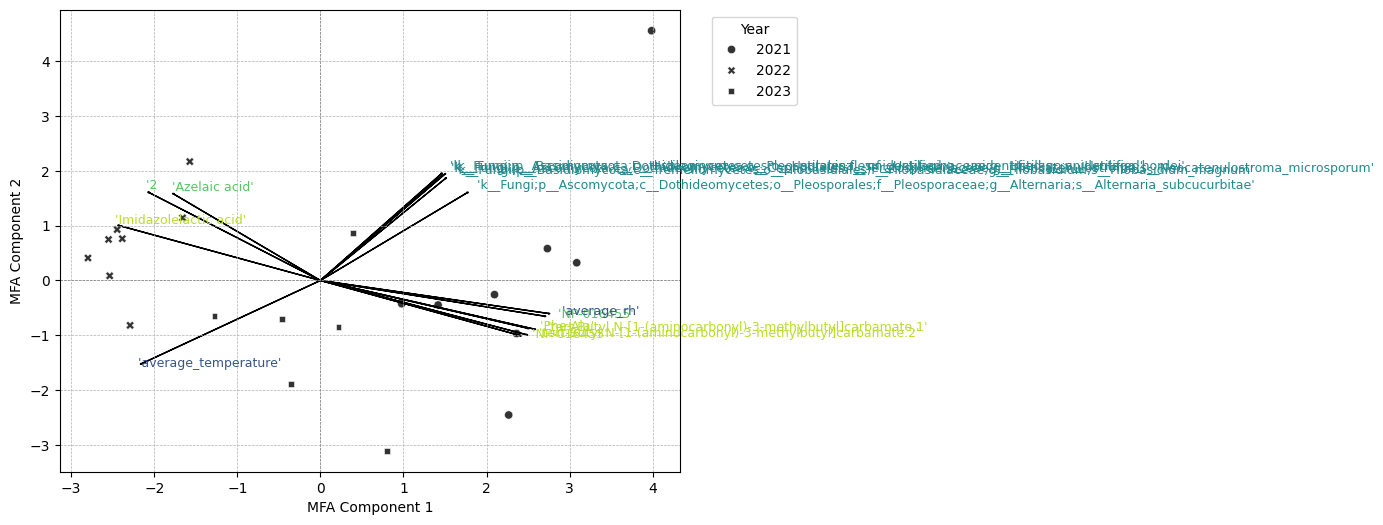

In [26]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], style="year", alpha=0.8, color='black')

# Define a scaling factor to extend the arrows
scaling_factor = 3  # Adjust this value to control arrow length

# Create a color map based on the group and intensity (Total Contribution)
norm = plt.Normalize(vmin=top_loadings['Loadings Contribution'].min(), vmax=top_loadings['Loadings Contribution'].max())  # Normalize based on Loadings Contribution
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm)
sm.set_array([])

# Plot the top loadings as arrows with colors based on the group and intensity by Total Contribution
for i, row in top_loadings.iterrows():
    # Color based on group
    group_color = group_colors.get(row['group'], 'black')  # Default to black if group is not found
    # Scale the arrow by Loadings Contribution
    intensity = norm(row['Loadings Contribution'])
    
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color='black', length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  # Adjust text position accordingly
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9, color=group_color)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("")

# Show grid and legend
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1.2, 1))

plt.show()


## Seperate Biplots

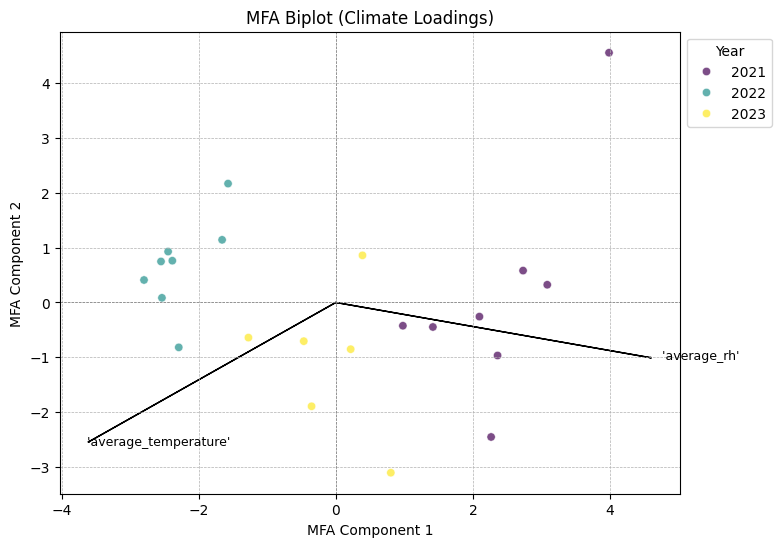

In [31]:
# Select only the "Climate" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Climate"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Climate Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

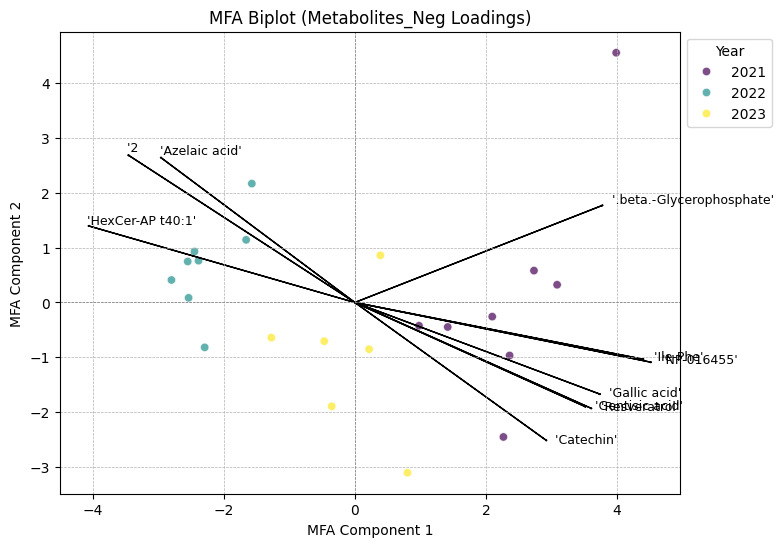

In [32]:
# Select only the 'Metabolites_Neg' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'Metabolites_Neg']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Metabolites_Neg Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

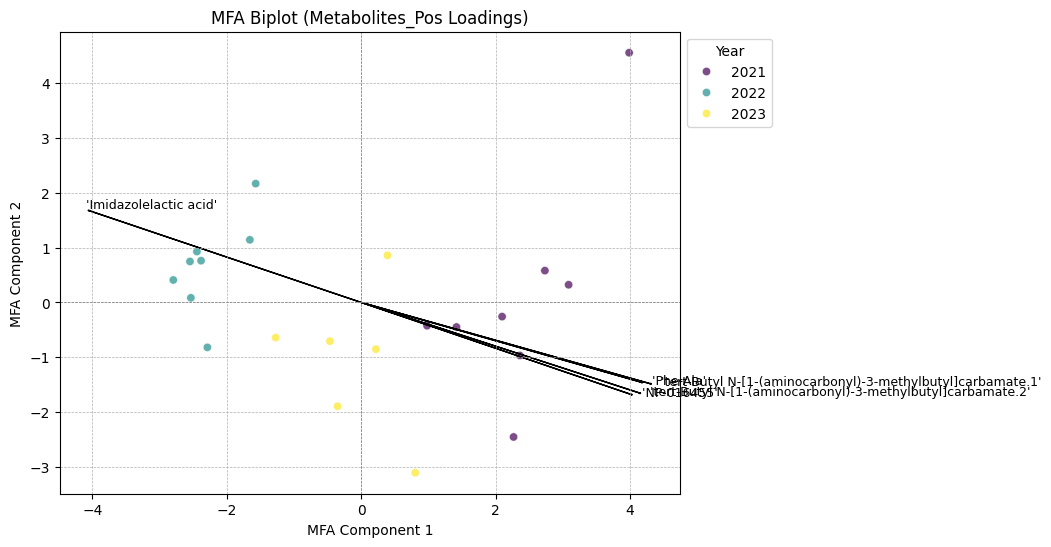

In [33]:
# Select only the 'Metabolites_Pos' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'Metabolites_Pos']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(5, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Metabolites_Pos Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

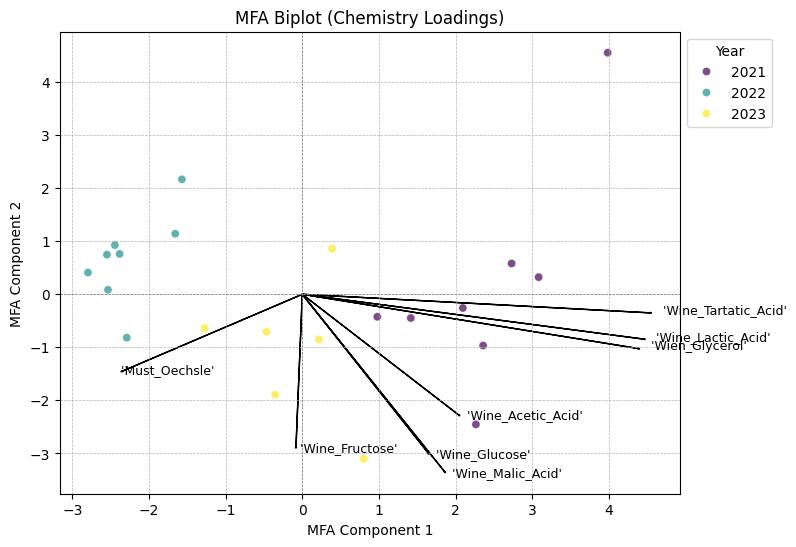

In [34]:
# Select only the 'Wine Chemistry' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'Wine Chemistry']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Chemistry Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

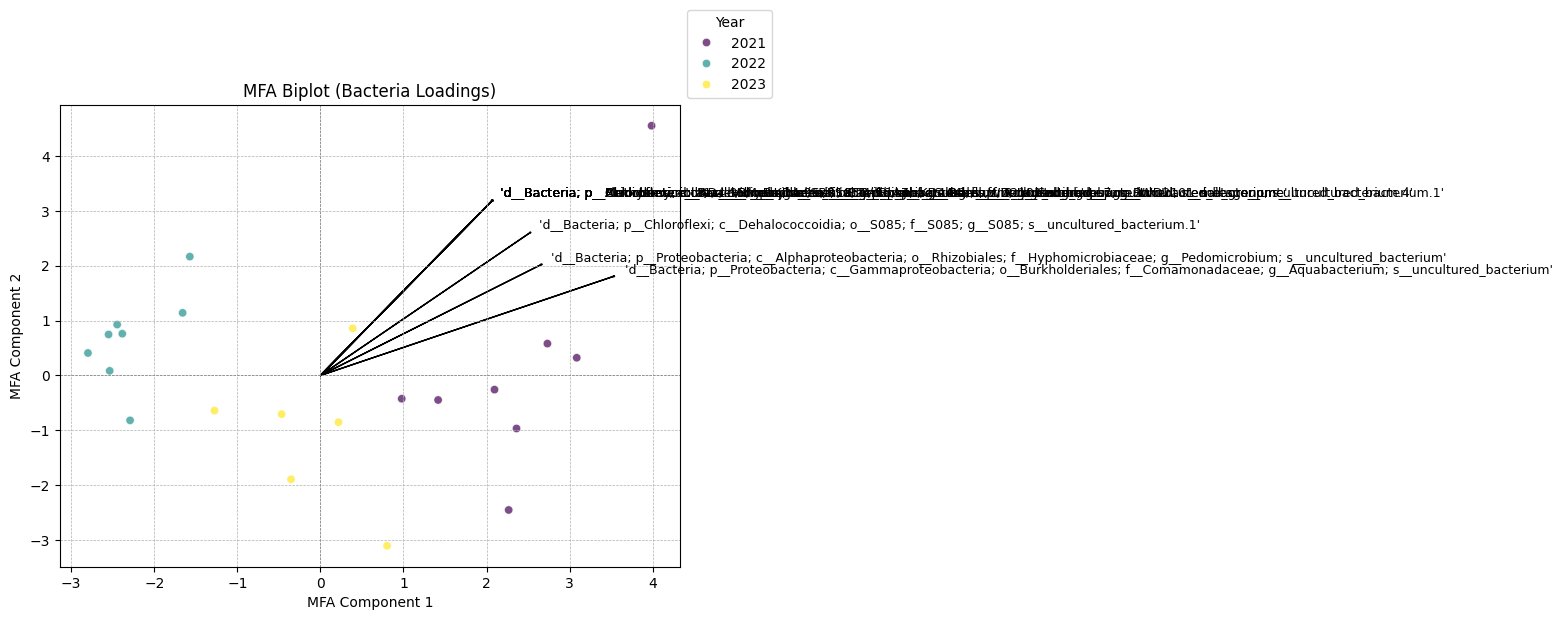

In [35]:
# Select only the "Bacteria" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Bacteria"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Bacteria Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

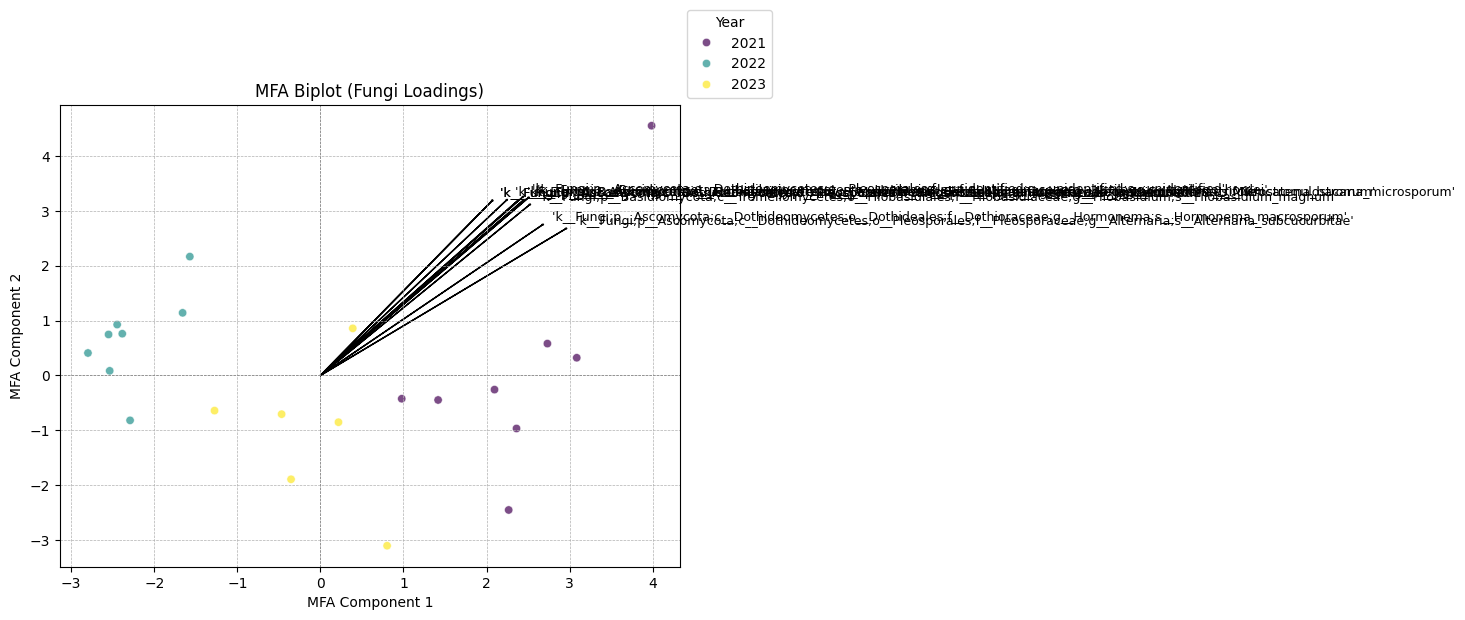

In [36]:
# Select only the "Fungi" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Fungi"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Fungi Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

# MFA single year

## How many Components?

In [59]:
df_mfa_year = df_merged_all[(df_merged_all['year'] == 2021)]

# Subset data and assign multi-index
df_mfa_year.drop(columns=metadata_columns, inplace=True)  # Drop metadata
df_mfa_year.columns = pd.MultiIndex.from_tuples(multi_index_columns)  # Assign multi-index
df_mfa_year = df_mfa_year.astype("float64")

# Extract the group names (first level of multi-index)
groups = df_mfa_year.columns.levels[0].tolist()
groups

/scratch/lfloerl/tmpdata/ipykernel_2641949/1619464699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mfa_year.drop(columns=metadata_columns, inplace=True)  # Drop metadata


['Bacteria',
 'Climate',
 'Fungi',
 'Metabolites_Neg',
 'Metabolites_Pos',
 'Plots',
 'Wine Chemistry']

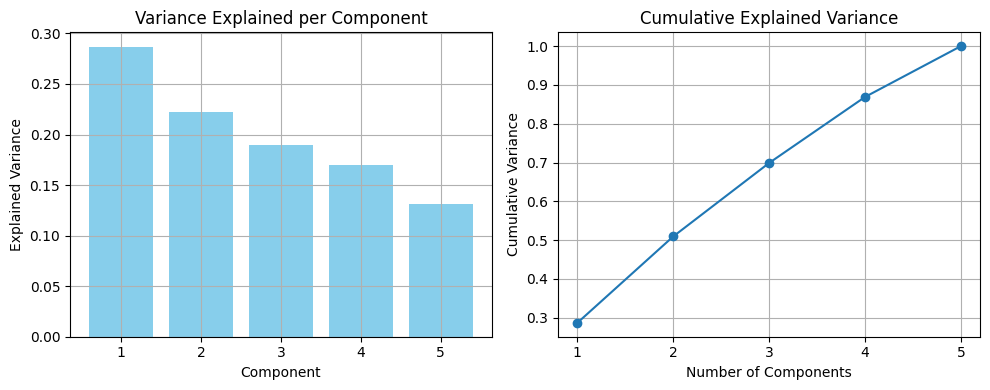

In [60]:
# Define the number of components to test
n_components = 5

# Define MFA and fit the model
mfa = prince.MFA(
    n_components=n_components,  
    n_iter=3, 
    copy=True,
    check_input=True,
    random_state=42)

# Fit MFA to the data (excluding metadata columns)
mfa = mfa.fit(
    df_mfa_year,
    groups=groups,
    supplementary_groups=None)

# Get explained variance per component
explained_variance_ratio = mfa.eigenvalues_ / np.sum(mfa.eigenvalues_)

# Create subplots for explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot for variance explained per component
axes[0].bar(range(1, n_components + 1), explained_variance_ratio[:n_components], color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Line plot for cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio[:n_components]), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()

In [61]:
# Initialize MFA model
mfa = prince.MFA(
    n_components=5,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit MFA with multi-index groups
mfa = mfa.fit(
    df_mfa_year,
    groups=groups,
    supplementary_groups=None)

mfa_results = mfa.transform(df_mfa_year)
# Merge MFA results with metadata to retain 'year' information
mfa_results = mfa_results.merge(df_metadata, left_index=True, right_index=True)

mfa.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,4.781,23.55%,23.55%
1,3.713,18.29%,41.84%
2,3.158,15.56%,57.40%
3,2.836,13.97%,71.37%
4,2.185,10.76%,82.13%


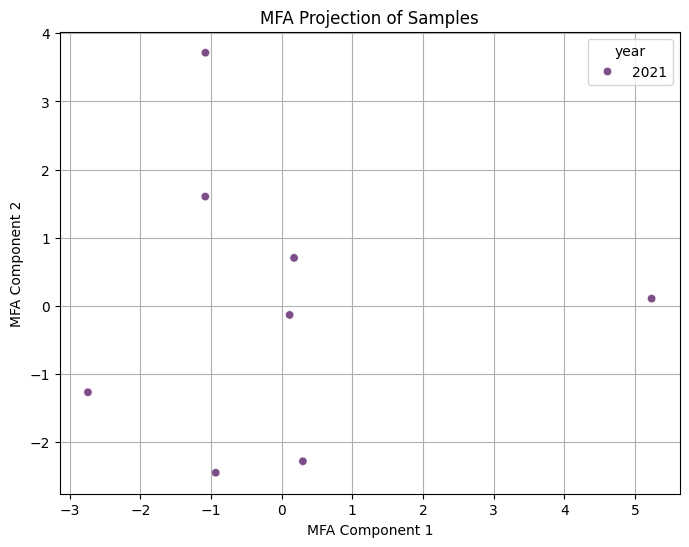

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)
plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")
plt.title("MFA Projection of Samples")
plt.grid()
plt.show()

In [63]:
# Extract coordinates of individuals (rows)
individuals = mfa_results.iloc[:, :2].values  # First 2 components

# Extract variable loadings (correlations with MFA axes)
variable_loadings = mfa.column_correlations.iloc[:, :2]

# Drop the multi-index
variable_loadings_df = variable_loadings.reset_index()

# Rename columns
variable_loadings_df.columns = ["Variable", "MFA Comp 1", "MFA Comp 2"]

# Compute Loadings contribution (sum of squared correlations)
variable_loadings_df["Loadings Contribution"] = ( variable_loadings_df["MFA Comp 1"].abs() + variable_loadings_df["MFA Comp 2"].abs())

# Sort by Loadings contribution in descending order
variable_loadings_df = variable_loadings_df.sort_values(by="Loadings Contribution", ascending=False)

variable_loadings_df["group"] = variable_loadings_df["Variable"].apply(lambda x: x[0])

# Select top 20 based on Loadings Contribution
top_loadings = variable_loadings_df.nlargest(15, "Loadings Contribution")
top_loadings['Variable'] = top_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

top_loadings

,Variable,MFA Comp 1,MFA Comp 2,Loadings Contribution,group
6,"(Bacteria, d__Bacteria; p__Proteobacteria; c__...",inf,inf,inf,Bacteria
1,"(Bacteria, d__Bacteria; p__Proteobacteria; c__...",-inf,-inf,inf,Bacteria
4,"(Bacteria, d__Bacteria; p__Planctomycetota; c_...",-inf,-inf,inf,Bacteria
508,"(Metabolites_Pos, Sulfaphenazole)",-0.885437,0.458988,1.344425,Metabolites_Pos
380,"(Metabolites_Pos, Adenine)",0.735355,-0.585377,1.320732,Metabolites_Pos


In [64]:
var_list = variable_loadings_df['Variable'].to_list()
var_list

[('Bacteria',
  'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Acetobacterales; f__Acetobacteraceae; g__Acetobacter; s__uncultured_Alphaproteobacteria'),
 ('Bacteria',
  'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Acetobacterales; f__Acetobacteraceae; g__Acetobacter; s__Acetobacter_cerevisiae'),
 ('Bacteria',
  'd__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__Pirellula; s__uncultured_Planctomycetaceae'),
 ('Metabolites_Pos', 'Sulfaphenazole'),
 ('Metabolites_Pos', 'Adenine'),
 ('Metabolites_Neg', 'NP-020521'),
 ('Metabolites_Neg', 'NP-016455'),
 ('Metabolites_Pos', 'Prolylleucine'),
 ('Metabolites_Pos', 'Valylproline'),
 ('Metabolites_Neg', 'Gentisic acid.1'),
 ('Metabolites_Pos', 'N3,N4-Dimethyl-L-arginine'),
 ('Metabolites_Pos', 'Hypoxanthine'),
 ('Metabolites_Neg', '3-Dehydroshikimic acid'),
 ('Metabolites_Pos', 'Ile-Gly-Ile'),
 ('Metabolites_Pos', 'Pro-Phe'),
 ('Metabolites_Neg', '2-Isopropylmalic acid'),
 ('Met

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/matplotlib/patches.py:1553: RuntimeWarning: invalid value encountered in scalar divide
  cx = self._dx / distance
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/matplotlib/patches.py:1554: RuntimeWarning: invalid value encountered in scalar divide
  sx = self._dy / distance
/scratch/lfloerl/tmpdata/ipykernel_2641949/3882181659.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Year", bbox_to_anchor=(1.2, 1))


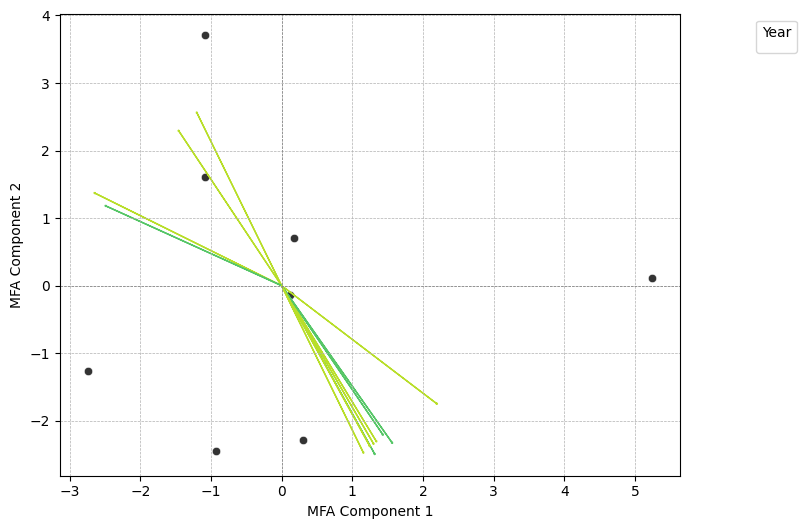

In [65]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], alpha=0.8, color='black')

# Define a scaling factor to extend the arrows
scaling_factor = 3  # Adjust this value to control arrow length

# Create a color map based on the group and intensity (Total Contribution)
norm = plt.Normalize(vmin=top_loadings['Loadings Contribution'].min(), vmax=top_loadings['Loadings Contribution'].max())  # Normalize based on Loadings Contribution
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm)
sm.set_array([])


# Plot the top loadings as arrows with colors based on the group and intensity by Total Contribution
for i, row in top_loadings.iterrows():
    # Color based on group
    group_color = group_colors.get(row['group'], 'black')  # Default to black if group is not found
    # Scale the arrow by Loadings Contribution
    intensity = norm(row['Loadings Contribution'])
    
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color=group_color, length_includes_head=True)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("")


# Show grid and legend
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1.2, 1))

plt.show()


# Dabble

In [106]:
# make the clustermap df
clustermap_df = df_merged_all.drop(columns=['year', 'plot']) 
clustermap_df.set_index('Sample Name', inplace=True)

clustermap_df.columns = pd.MultiIndex.from_tuples(multi_index_columns)
clustermap_df = clustermap_df.astype("float64")

# Remove low-variance columns
#clustermap_df_var = clustermap_df.loc[:, clustermap_df.std() > 1e-10] 
clustermap_df_var = clustermap_df.loc[:, clustermap_df.std() > 1e-1] 

# Extract the group names (first level of multi-index)
groups = clustermap_df.columns.levels[0].tolist()

# Extract first level of MultiIndex (group names)
column_groups = clustermap_df_var.columns.get_level_values(0)
# Map group names to their assigned colors
col_colors = column_groups.map(group_colors)

print('Clusermap before: '+ str(clustermap_df.shape))
print('Clusermap remove low variane: '+ str(clustermap_df_var.shape))

Clusermap before: (22, 558)
Clusermap remove low variane: (22, 524)


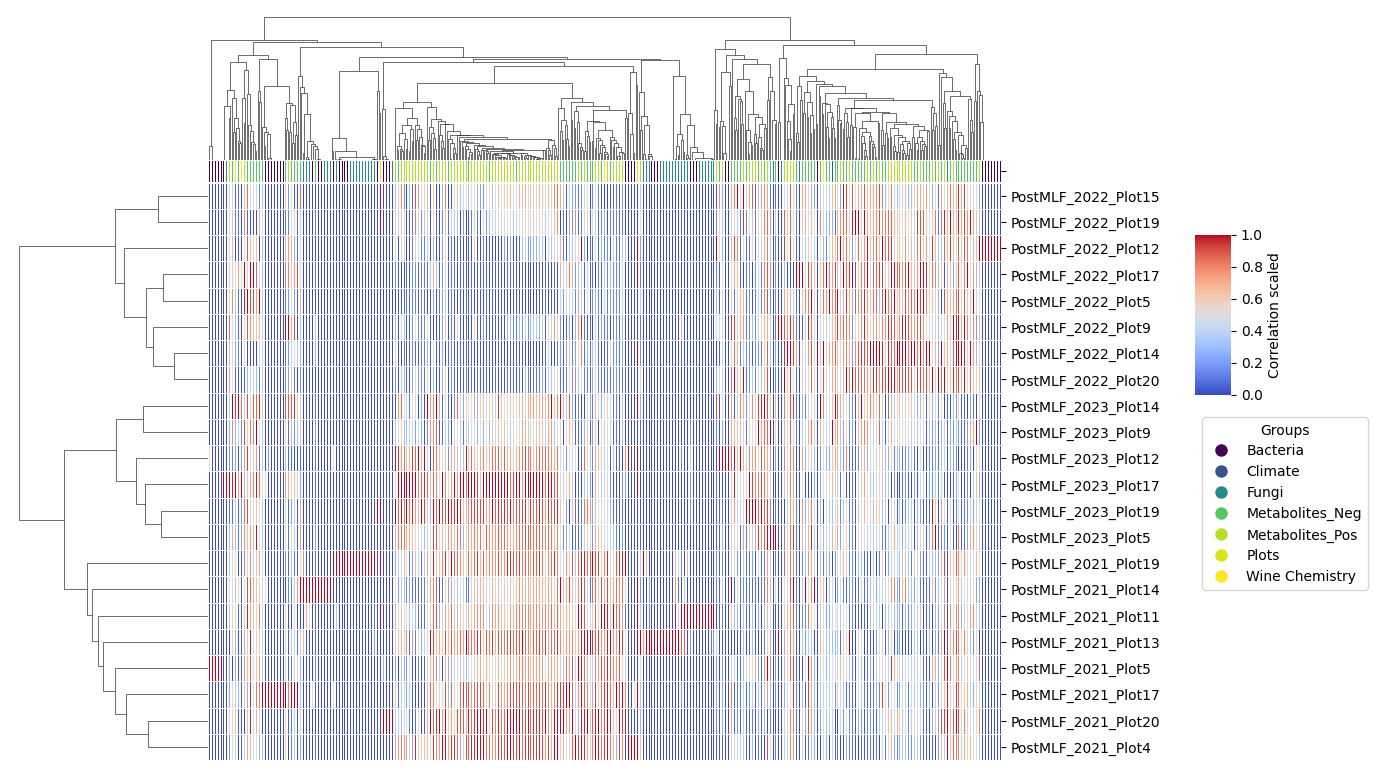

In [107]:
# Ensure col_colors is a Series with the same column names as your clustermap_df_var
col_colors = pd.Series(col_colors, index=clustermap_df_var.columns)

# Plot with sns.clustermap
g = sns.clustermap(clustermap_df_var, metric="correlation", row_cluster=True, col_cluster=True, 
                   col_colors=col_colors, cmap="coolwarm", linewidths=0.5, figsize=(12, 8),standard_scale=1,
                   xticklabels=False,  # Remove column labels
                   cbar_pos=(1, .5, .03, .2))  # Adjust the colorbar position if needed

# Set labels and title using the clustermap object
g.ax_heatmap.set_xlabel("")
g.ax_heatmap.set_ylabel("")
g.ax_heatmap.set_title("")

# Optionally, adjust color bar or any other settings via the returned axes
g.cax.set_ylabel("Correlation scaled")  # If you'd like to remove colorbar label

# Adjust the column label size
for label in g.ax_col_dendrogram.get_xticklabels():
    label.set_fontsize(10)  # Set column label font size smaller
for label in g.ax_row_dendrogram.get_yticklabels():
    label.set_fontsize(10)  # Set row label font size smaller

# Create legends for col_colors with group names instead of hex codes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in group_colors.values()]  # Use the colors from group_colors
labels = list(group_colors.keys())  # Use the group names for the legend labels


# Place the legends outside the plot and stack them vertically
plt.legend(handles=handles, labels=labels, title="Groups", bbox_to_anchor=(0, -0.1), loc='upper left', ncol=1)

# Show the plot
plt.show()